<h1><center> PPOL 5203 : Final Project Main Analysis <br><br> 
<font color='grey'> Geospatial Bikeshare in Washington DC <br><br>
Ibadat Jarg and Helen Wang</center></center> <h1> 

In [18]:
#Setup
import numpy as np
import pandas as pd
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
#Loading our data
df = pd.read_csv("../data/cleaned_data/final_data.csv")

#seeeing station openned by year
#grouped = df.groupby('Opening Year').size()

# Display the result
#print(grouped)


In [13]:
#Filtering by specified year
df = df[df['opened_2013'] == True]

df

,id,long,lat,open_year,name,2010,2011,2012,2013,2014,2015,2016,opened_station,opened_2013
3,082544b7-1f3f-11e7-bf6b-3863bb334450,-77.077078,38.943837,2013.0,39th & Veazey St NW,16736.666667,16823.000000,17252.666667,16876.000000,17190.000000,17311.666667,14909.000000,1,True
20,08256e7b-1f3f-11e7-bf6b-3863bb334450,-77.026141,38.887332,2013.0,Independence Ave & L'Enfant Plaza SW/DOE,14210.444444,12654.444444,13117.111111,14776.888889,15654.222222,14928.300000,15726.100000,1,True
21,0825756e-1f3f-11e7-bf6b-3863bb334450,-77.092210,38.983838,2013.0,Montgomery Ave & Waverly St,22067.600000,22666.800000,23600.600000,23488.800000,23461.200000,22585.000000,22596.800000,1,True
34,0825b27e-1f3f-11e7-bf6b-3863bb334450,-77.100239,38.990639,2013.0,Norfolk & Rugby Ave,31712.000000,30030.000000,29791.000000,29852.000000,29010.000000,29761.000000,30332.000000,1,True
50,0825b8f0-1f3f-11e7-bf6b-3863bb334450,-77.050046,38.923583,2013.0,Calvert St & Woodley Pl NW,20007.500000,20111.000000,19929.500000,15320.333333,14888.500000,14009.400000,14377.800000,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0825bce9-1f3f-11e7-bf6b-3863bb334450,-77.109647,38.999634,2013.0,Old Georgetown Rd & Southwick St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True
763,082553a7-1f3f-11e7-bf6b-3863bb334450,-76.995193,38.889988,2013.0,8th & East Capitol St NE,6991.750000,6506.375000,6442.875000,7348.444444,7770.000000,7941.727273,8106.909091,1,True
764,08259804-1f3f-11e7-bf6b-3863bb334450,-77.029350,38.990249,2013.0,East West Hwy & Blair Mill Rd,17294.000000,16077.750000,15950.000000,15988.500000,16162.500000,16595.500000,16925.250000,1,True
769,0825b10b-1f3f-11e7-bf6b-3863bb334450,-77.011210,38.975000,2013.0,Carroll & Westmoreland Ave,10312.500000,10361.500000,10610.500000,10645.000000,9947.000000,9983.333333,10416.333333,1,True


### Data Manipulation



In [ ]:
#Adding % change in traffic per station relative to 2013
for year in ['2010', '2011', '2012', '2014', '2015', '2016']:
    df[f'Percent_Change_{year}'] = ((df[year] - df['2013']) / df['2013']) * 100

### Plotting our discontinuity 


In [ ]:
#Setup for plotting 
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
percent_changes = df[[f'Percent_Change_{year}' for year in years if year != 2013]].mean(axis=0).values
pre_break = years[:years.index(2013)]
post_break = years[years.index(2013) + 1:]

In [48]:
#Viewing the data
df

,id,long,lat,open_year,name,2010,2011,2012,2013,2014,2015,2016,opened_station,opened_2013,Percent_Change_2010,Percent_Change_2011,Percent_Change_2012,Percent_Change_2014,Percent_Change_2015,Percent_Change_2016
3,082544b7-1f3f-11e7-bf6b-3863bb334450,-77.077078,38.943837,2013.0,39th & Veazey St NW,16736.666667,16823.000000,17252.666667,16876.000000,17190.000000,17311.666667,14909.000000,1,True,-0.825630,-0.314055,2.231967,1.860630,2.581575,-11.655606
20,08256e7b-1f3f-11e7-bf6b-3863bb334450,-77.026141,38.887332,2013.0,Independence Ave & L'Enfant Plaza SW/DOE,14210.444444,12654.444444,13117.111111,14776.888889,15654.222222,14928.300000,15726.100000,1,True,-3.833313,-14.363270,-11.232255,5.937199,1.024648,6.423619
21,0825756e-1f3f-11e7-bf6b-3863bb334450,-77.092210,38.983838,2013.0,Montgomery Ave & Waverly St,22067.600000,22666.800000,23600.600000,23488.800000,23461.200000,22585.000000,22596.800000,1,True,-6.050543,-3.499540,0.475972,-0.117503,-3.847791,-3.797555
34,0825b27e-1f3f-11e7-bf6b-3863bb334450,-77.100239,38.990639,2013.0,Norfolk & Rugby Ave,31712.000000,30030.000000,29791.000000,29852.000000,29010.000000,29761.000000,30332.000000,1,True,6.230738,0.596275,-0.204341,-2.820582,-0.304837,1.607932
50,0825b8f0-1f3f-11e7-bf6b-3863bb334450,-77.050046,38.923583,2013.0,Calvert St & Woodley Pl NW,20007.500000,20111.000000,19929.500000,15320.333333,14888.500000,14009.400000,14377.800000,1,True,30.594417,31.269990,30.085290,-2.818694,-8.556820,-6.152172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,0825bce9-1f3f-11e7-bf6b-3863bb334450,-77.109647,38.999634,2013.0,Old Georgetown Rd & Southwick St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,NaN,NaN,NaN,NaN,NaN,NaN
763,082553a7-1f3f-11e7-bf6b-3863bb334450,-76.995193,38.889988,2013.0,8th & East Capitol St NE,6991.750000,6506.375000,6442.875000,7348.444444,7770.000000,7941.727273,8106.909091,1,True,-4.854013,-11.459152,-12.323281,5.736664,8.073584,10.321431
764,08259804-1f3f-11e7-bf6b-3863bb334450,-77.029350,38.990249,2013.0,East West Hwy & Blair Mill Rd,17294.000000,16077.750000,15950.000000,15988.500000,16162.500000,16595.500000,16925.250000,1,True,8.165244,0.558214,-0.240798,1.088282,3.796479,5.858899
769,0825b10b-1f3f-11e7-bf6b-3863bb334450,-77.011210,38.975000,2013.0,Carroll & Westmoreland Ave,10312.500000,10361.500000,10610.500000,10645.000000,9947.000000,9983.333333,10416.333333,1,True,-3.123532,-2.663222,-0.324096,-6.557069,-6.215751,-2.148113


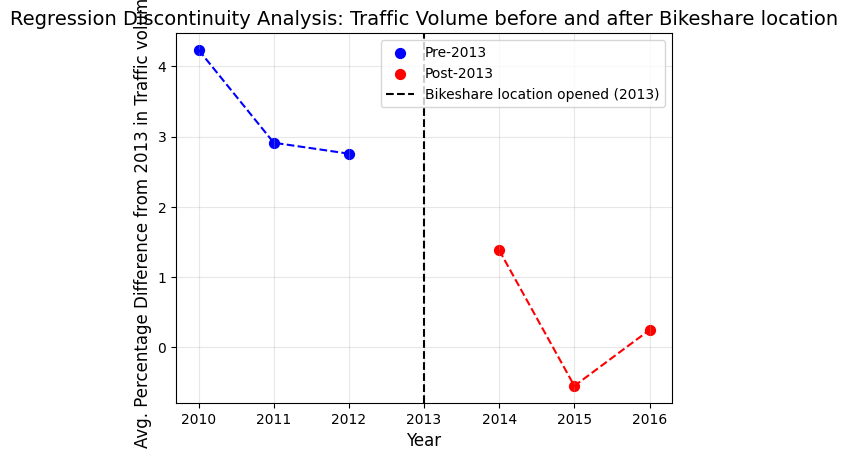

In [52]:
# Pre-breakpoint
plt.scatter(pre_break, percent_changes[:len(pre_break)], color='blue', label='Pre-2013', s=50)
plt.plot(pre_break, percent_changes[:len(pre_break)], color='blue', linestyle='--')

# Post-breakpoint
plt.scatter(post_break, percent_changes[len(pre_break):], color='red', label='Post-2013', s=50)
plt.plot(post_break, percent_changes[len(pre_break):], color='red', linestyle='--')

# Breakpoint
plt.axvline(x=2013, color='black', linestyle='--', label='Bikeshare location opened (2013)')

# Labels and Legend
plt.title('Regression Discontinuity Analysis: Traffic Volume before and after Bikeshare location', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg. Percentage Difference from 2013 in Traffic volume', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

c:\Users\Ibadat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ibadat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


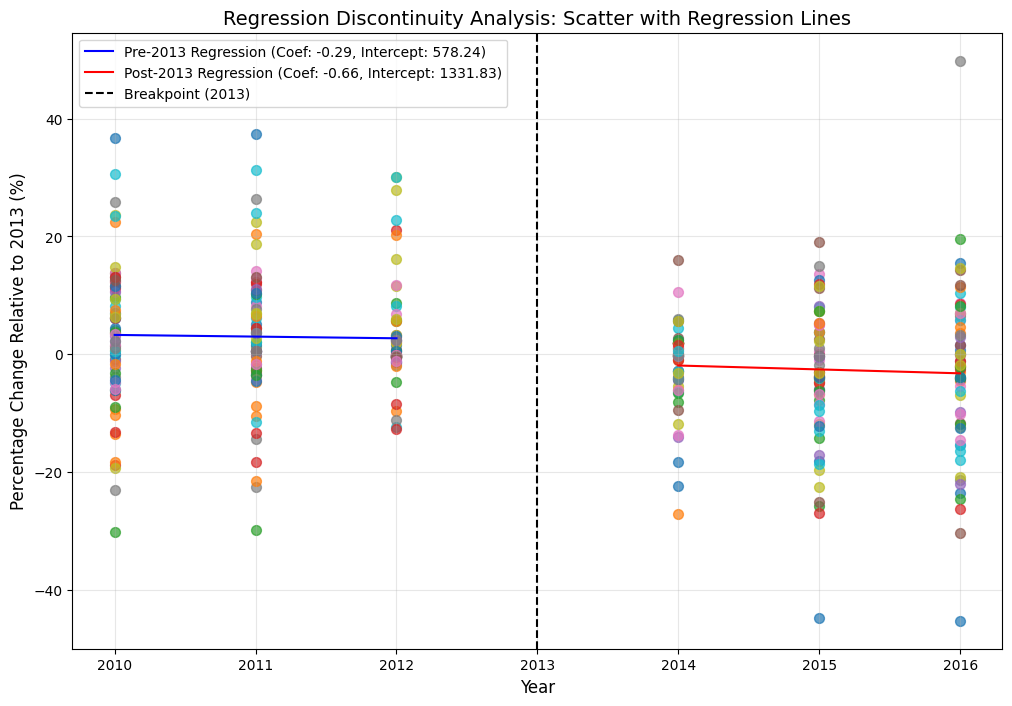

In [53]:
#Revoing outliers 
melted_df_clean = melted_df_clean[melted_df_clean['Percent Change'] <= 50] ###We are removing changes greater %50

# Separate pre- and post-discontinuity data again after cleaning
pre_data = melted_df_clean[melted_df_clean['Year'] < 2013]
post_data = melted_df_clean[melted_df_clean['Year'] > 2013]

# Fit regression models using sklearn's LinearRegression
pre_model = LinearRegression().fit(pre_data[['Year']], pre_data['Percent Change'])
post_model = LinearRegression().fit(post_data[['Year']], post_data['Percent Change'])

# Generate regression lines using the fitted models
years_pre = np.linspace(pre_data['Year'].min(), pre_data['Year'].max(), 100).reshape(-1, 1)
years_post = np.linspace(post_data['Year'].min(), post_data['Year'].max(), 100).reshape(-1, 1)

reg_line_pre = pre_model.predict(years_pre)
reg_line_post = post_model.predict(years_post)

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot for all data points
for id_, group in melted_df_clean.groupby('id'):
    plt.scatter(group['Year'], group['Percent Change'], s=50, alpha=0.7)

# Add regression lines
plt.plot(years_pre, reg_line_pre, color='blue', linestyle='-', label=f'Pre-2013 Regression (Coef: {pre_model.coef_[0]:.2f}, Intercept: {pre_model.intercept_:.2f})')
plt.plot(years_post, reg_line_post, color='red', linestyle='-', label=f'Post-2013 Regression (Coef: {post_model.coef_[0]:.2f}, Intercept: {post_model.intercept_:.2f})')

# Breakpoint at 2013
plt.axvline(x=2013, color='black', linestyle='--', label='Breakpoint (2013)')

# Labels and Title
plt.title('Regression Discontinuity Analysis: Scatter with Regression Lines', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change Relative to 2013 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

### Statistical Results 

In [56]:
# Separate pre- and post-discontinuity data again after cleaning
pre_data = melted_df_clean[melted_df_clean['Year'] < 2013]
post_data = melted_df_clean[melted_df_clean['Year'] > 2013]

# Adding constant for intercept using statsmodel 'sm'
pre_X = sm.add_constant(pre_data[['Year']])
post_X = sm.add_constant(post_data[['Year']])

# Fit models using statsmodels OLS using statsmodel 'sm'
pre_model_stats = sm.OLS(pre_data['Percent Change'], pre_X).fit()
post_model_stats = sm.OLS(post_data['Percent Change'], post_X).fit()


In [57]:
# Display the summary of the pre-2013 model
print("Pre-2013 Model Summary:")
print(pre_model_stats.summary())

Pre-2013 Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Percent Change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.09632
Date:                Fri, 06 Dec 2024   Prob (F-statistic):              0.757
Time:                        18:08:30   Log-Likelihood:                -794.16
No. Observations:                 209   AIC:                             1592.
Df Residuals:                     207   BIC:                             1599.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        578.2381   1853

In [58]:
# Display the summary of the post-2013 model
print("\nPost-2013 Model Summary:")
print(post_model_stats.summary())


Post-2013 Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Percent Change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5169
Date:                Fri, 06 Dec 2024   Prob (F-statistic):              0.473
Time:                        18:08:34   Log-Likelihood:                -785.68
No. Observations:                 207   AIC:                             1575.
Df Residuals:                     205   BIC:                             1582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1331.8318   18